# Using Nilearn

This are examples using nilearn to see an plot

First using an image preload from the library.


In [1]:
from nilearn.datasets import MNI152_FILE_PATH
import matplotlib.pyplot as plt
%matplotlib inline
# Note that the variable MNI152_FILE_PATH is just a path to a Nifti file
print('Path to MNI152 template: %r' % MNI152_FILE_PATH)



c:\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Path to MNI152 template: 'c:\\python37\\lib\\site-packages\\nilearn\\datasets\\data\\avg152T1_brain.nii.gz'


In [2]:
from nilearn import image
smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=3)

# While we are giving a file name as input, the function returns
# an in-memory object:
print(smooth_anat_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine: 
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 8274.68
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL3.3'
aux_file        : b''
qform_code      : mni
sform_cod

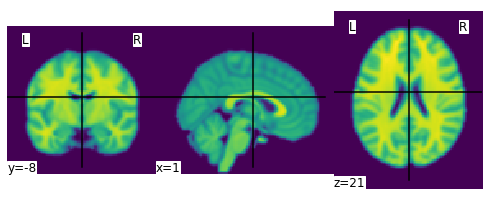

In [3]:
from nilearn import plotting
plotting.plot_img(smooth_anat_img)

### Running with local images.

Assuming data folder is on the root of the folder.

In [4]:
image = image.smooth_img('../Data/GE3T/100/orig/3DT1.nii.gz', fwhm=3)

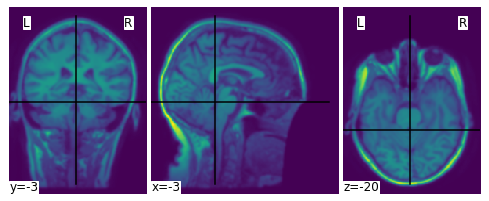

In [5]:
plotting.plot_img(image)

## Using nibabel

Nibabel is the default library from neuroimaging on python, let see how is seen on them

In [6]:
import nibabel as nib
imageNib1 = nib.load('../Data/GE3T/100/orig/3DT1.nii.gz')
imageNib1_img_data = imageNib1.get_fdata()

In [7]:
imageNib1_img_data.shape

(256, 256, 176)

In [8]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

Text(0.5, 0.98, 'Center slices for T1 image')

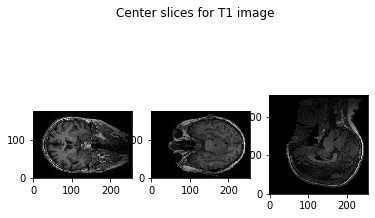

In [9]:
slice_0_imageNib1_img_data = imageNib1_img_data[128,:,:]
slice_1_imageNib1_img_data = imageNib1_img_data[:,128,:]
slice_2_imageNib1_img_data = imageNib1_img_data[:,:,88]
show_slices([slice_0_imageNib1_img_data, slice_1_imageNib1_img_data, slice_2_imageNib1_img_data])
plt.suptitle("Center slices for T1 image")

In [10]:
print(imageNib1.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 176   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     0.9375 0.9375 1.     0.     0.     0.     0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : -0.5
quatern_c       : 0.5
quatern_d       : -0.5
qoffset_x       : -88.235
qoffset_y       : 153.922
qoffset_z       : 100.503
srow_x   

## pre processed vs orig
Let's compare the pre_processed data and the original data for the flair image.


In [11]:
imageFlairPre1 = nib.load('../Data/GE3T/100/pre/FLAIR.nii.gz')
imageFlairPre1_img_data = imageFlairPre1.get_fdata()
imageFlairPre1_img_data.shape

(132, 256, 83)

Text(0.5, 0.98, 'Center slices for FLAIR image')

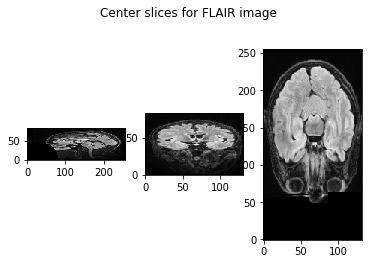

In [12]:
slice_0_imageFlairPre1_img_data = imageFlairPre1_img_data[66,:,:]
slice_1_imageFlairPre1_img_data = imageFlairPre1_img_data[:,128,:]
slice_2_imageFlairPre1_img_data = imageFlairPre1_img_data[:,:,41]
show_slices([slice_0_imageFlairPre1_img_data, slice_1_imageFlairPre1_img_data, slice_2_imageFlairPre1_img_data])
plt.suptitle("Center slices for FLAIR image")

In [13]:
print(imageFlairPre1.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 132 256  83   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.         1.2        0.97659993 3.         0.         0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 77.1333
qoffset_y       : 159.634
qoffset_z  

In [14]:
imageFlairOrig1 = nib.load('../Data/GE3T/100/orig/FLAIR.nii.gz')
imageFlairOrig1_img_data = imageFlairOrig1.get_fdata()
imageFlairOrig1_img_data.shape

(132, 256, 83)

Text(0.5, 0.98, 'Center slices for FLAIR image')

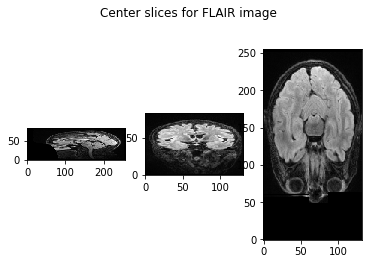

In [15]:
slice_0_imageFlairOrig1_img_data = imageFlairOrig1_img_data[66,:,:]
slice_1_imageFlairOrig1_img_data = imageFlairOrig1_img_data[:,128,:]
slice_2_imageFlairOrig1_img_data = imageFlairOrig1_img_data[:,:,41]
show_slices([slice_0_imageFlairOrig1_img_data, slice_1_imageFlairOrig1_img_data, slice_2_imageFlairOrig1_img_data])
plt.suptitle("Center slices for FLAIR image")

In [16]:
print(imageFlairOrig1.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 132 256  83   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     1.2    0.9766 3.     0.     0.     0.     0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 77.1333
qoffset_y       : 159.634
qoffset_z       : -143.7237
srow_x   

## Let see data from the other sources


In [17]:
# Data from Singapore
imageFlairPre2 = nib.load('../Data/Singapore/60/pre/FLAIR.nii.gz')
imageFlairPre2_img_data = imageFlairPre2.get_fdata()
imageFlairPre2_img_data.shape

(232, 256, 48)

Text(0.5, 0.98, 'Center slices for FLAIR image')

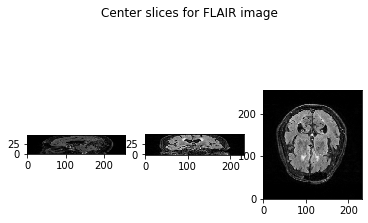

In [18]:
slice_0_imageFlairPre2_img_data = imageFlairPre2_img_data[115,:,:]
slice_1_imageFlairPre2_img_data = imageFlairPre2_img_data[:,128,:]
slice_2_imageFlairPre2_img_data = imageFlairPre2_img_data[:,:,24]
show_slices([slice_0_imageFlairPre2_img_data, slice_1_imageFlairPre2_img_data, slice_2_imageFlairPre2_img_data])
plt.suptitle("Center slices for FLAIR image")

In [19]:
print(imageFlairPre2.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 232 256  48   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.         1.         0.99999994 3.0000005  0.         0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : -0.0016073112
quatern_c       : 0.028749073
quatern_d       : 0.9980268
qoffset_x       : 133.12364
qoffset_y  

In [22]:
# Data from Singapore
imageFlairOrig2 = nib.load('../Data/Singapore/60/orig/FLAIR.nii.gz')
imageFlairOrig2_img_data = imageFlairOrig2.get_fdata()
imageFlairOrig2_img_data.shape

(232, 256, 48)

Text(0.5, 0.98, 'Center slices for FLAIR image')

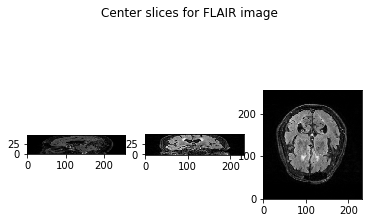

In [23]:
slice_0_imageFlairOrig2_img_data = imageFlairOrig2_img_data[115,:,:]
slice_1_imageFlairOrig2_img_data = imageFlairOrig2_img_data[:,128,:]
slice_2_imageFlairOrig2_img_data = imageFlairOrig2_img_data[:,:,24]
show_slices([slice_0_imageFlairOrig2_img_data, slice_1_imageFlairOrig2_img_data, slice_2_imageFlairOrig2_img_data])
plt.suptitle("Center slices for FLAIR image")

In [24]:
print(imageFlairOrig2.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 232 256  48   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        1.        1.        3.0000002 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : -0.0016073227
quatern_c       : 0.028749075
quatern_d       : 0.9980268
qoffset_x       : 133.12364
qoffset_y       : 1

In [26]:
# Data from Utrecht
imageFlairPre3 = nib.load('../Data/Utrecht/0/pre/FLAIR.nii.gz')
imageFlairPre3_img_data = imageFlairPre3.get_fdata()
imageFlairPre3_img_data.shape

(240, 240, 48)

Text(0.5, 0.98, 'Center slices for FLAIR image')

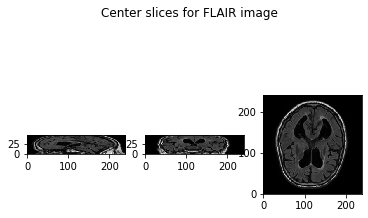

In [27]:
slice_0_imageFlairPre3_img_data = imageFlairPre3_img_data[120,:,:]
slice_1_imageFlairPre3_img_data = imageFlairPre3_img_data[:,120,:]
slice_2_imageFlairPre3_img_data = imageFlairPre3_img_data[:,:,24]
show_slices([slice_0_imageFlairPre3_img_data, slice_1_imageFlairPre3_img_data, slice_2_imageFlairPre3_img_data])
plt.suptitle("Center slices for FLAIR image")

In [28]:
print(imageFlairPre3.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240  48   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.         0.9583333  0.95833325 2.9999993  0.         0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.031557195
quatern_c       : -0.21605442
quatern_d       : 0.9756906
qoffset_x       : 118.610664
qoffset_y   

In [29]:
imageFlairOrig3 = nib.load('../Data/Utrecht/0/orig/FLAIR.nii.gz')
imageFlairOrig3_img_data = imageFlairOrig3.get_fdata()
imageFlairOrig3_img_data.shape

(240, 240, 48)

Text(0.5, 0.98, 'Center slices for FLAIR image')

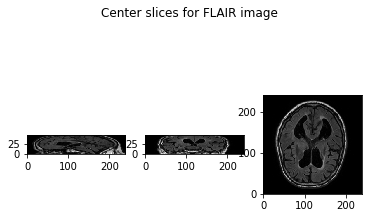

In [30]:
slice_0_imageFlairOrig3_img_data = imageFlairOrig3_img_data[120,:,:]
slice_1_imageFlairOrig3_img_data = imageFlairOrig3_img_data[:,120,:]
slice_2_imageFlairOrig3_img_data = imageFlairOrig3_img_data[:,:,24]
show_slices([slice_0_imageFlairOrig3_img_data, slice_1_imageFlairOrig3_img_data, slice_2_imageFlairOrig3_img_data])
plt.suptitle("Center slices for FLAIR image")

In [31]:
print(imageFlairOrig3.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240  48   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.9583333 0.9583333 2.9999993 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.031557195
quatern_c       : -0.21605445
quatern_d       : 0.9756906
qoffset_x       : 118.610664
qoffset_y       : 12